In [4]:
from PIL import Image
import numpy as np
import os

# Set directory containing images
img_dir = "World"

# Create empty list to store pixel data
pixel_data = []

# Loop through all images in directory
for filename in os.listdir(img_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Open image using PIL library
        img = Image.open(os.path.join(img_dir, filename))
        
        # Convert image to numpy array
        img_array = np.array(img)
        
        # Append image array to pixel_data list
        pixel_data.append(img_array)

# Get the maximum shape of all images
max_shape = tuple(max([img.shape[i] for img in pixel_data]) for i in range(3))

# Create an empty numpy array with the maximum shape
pixel_data_np = np.zeros((len(pixel_data),) + max_shape, dtype=np.uint8)

# Copy each image to the empty array, padded with zeros if necessary
for i, img_array in enumerate(pixel_data):
    pixel_data_np[i, :img_array.shape[0], :img_array.shape[1], :img_array.shape[2]] = img_array

# Reshape the array to 2D
pixel_data_np = pixel_data_np.reshape((pixel_data_np.shape[0], -1))

# Create pandas dataframe from pixel_data_np numpy array
import pandas as pd
df = pd.DataFrame(pixel_data_np)
 
# save the dataframe as a csv file
df.to_csv("BBC_World_Canada.csv")


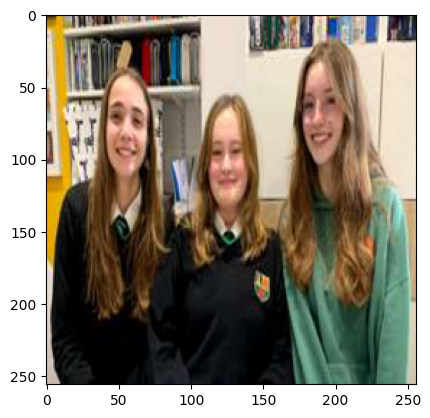

In [33]:
import matplotlib.pyplot as plt

# Retrieve the first row of the dataframe
first_image = df.iloc[10]

# Reshape the flattened array to the original 2D shape of the image
reshaped_image = first_image.values.reshape(img_size[0], img_size[1], 3)

# Display the image using matplotlib
plt.imshow(reshaped_image)
plt.show()
